In [112]:
# Specific imports for cellular_raza
# The package is named cr_autophagy
# We want to reload the package when some of the behind-the scenes python functions change
# This is what the importlib statements are for
import importlib
import cr_autophagy as cra
importlib.reload(cra)

# Imports of general-purpose python libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pyvista as pv
import multiprocessing as mp
from pathlib import Path
import os

output_path = cra.get_last_output_path()
# output_path = Path("out/autophagy/2023-11-24-18-05-41")
print(output_path)
simulation_settings = cra.get_simulation_settings(output_path)
iter_0_particles = cra.get_particles_at_iter(output_path, 0)
max_iter = max(cra.get_all_iterations(output_path))

out\autophagy\2023-12-06-T11-51-33


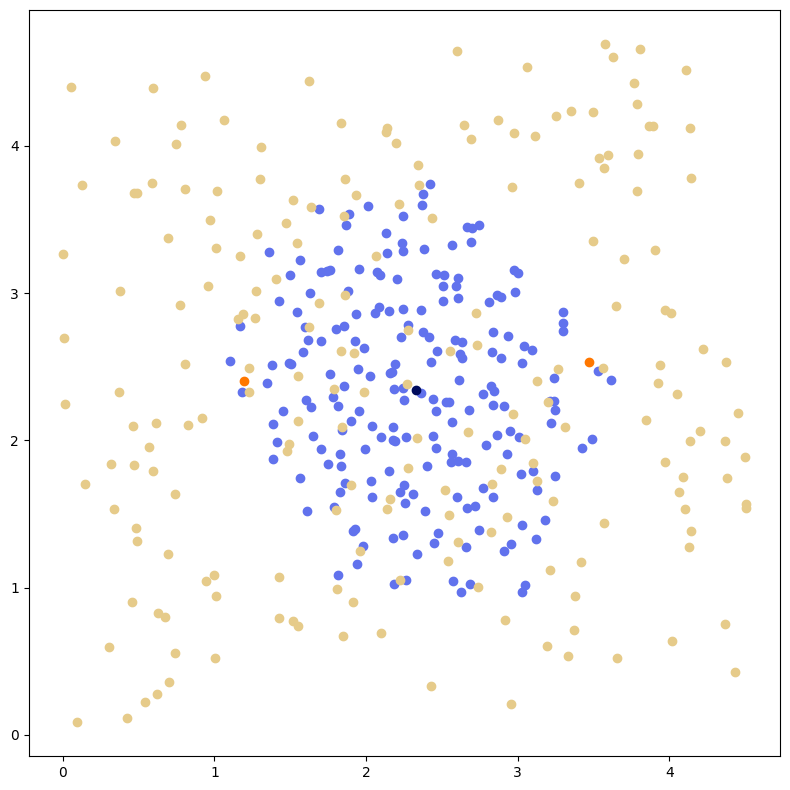

In [113]:
cargo_colour = "#000b5c"
atg11_colour = "#ff7700"

import scipy as sp
data_cells = cra.get_particles_at_iter(output_path, max_iter)

cargo_mask = data_cells["element.cell.interaction.species"]=="Cargo"
data = np.array([x for x in data_cells["element.cell.mechanics.pos"]])
whitened = sp.cluster.vq.whiten(data)
whitened_cargo = sp.cluster.vq.whiten(data)[cargo_mask]
whitened_atg11 = sp.cluster.vq.whiten(data)[cargo_mask==False]
book_atg11 = np.array((whitened_atg11[0], whitened_atg11[2]))
codebook_cargo, distortion_cargo = sp.cluster.vq.kmeans(whitened_cargo, 1)
codebook_atg11, distoration_atg11 = sp.cluster.vq.kmeans(whitened_atg11, book_atg11)

fig, ax = plt.subplots(figsize=(8, 8))
# Plot the points of particles
ax.scatter(whitened_cargo[:,2], whitened_cargo[:,1], color="#6172ed")
ax.scatter(whitened[cargo_mask==False][:,2], whitened[cargo_mask==False][:,1], color="#e6cb8a")

# Plot the located clusters
ax.scatter(codebook_cargo[:,2], codebook_cargo[:,1], color="#000b5c")
ax.scatter(codebook_atg11[:,2], codebook_atg11[:,1], color="#ff7700")

plt.show(fig)

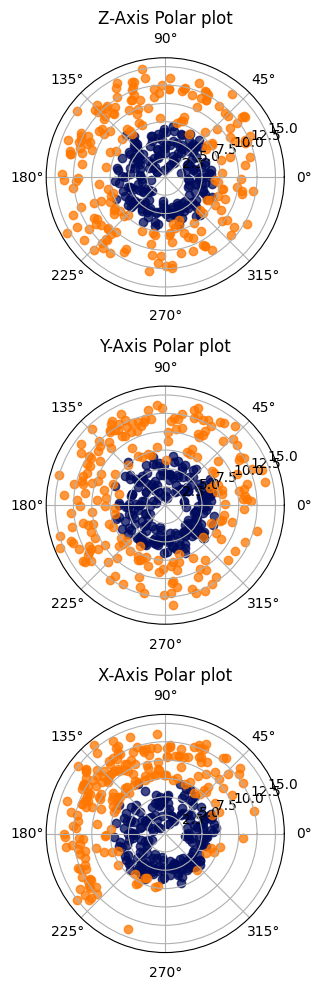

In [114]:
from numpy import (array, dot, arccos, clip)
from numpy.linalg import norm
import math

r_cargo = norm(cargo_pos-cargo_middle,axis=1)
r_atg11 = norm(atg11_pos-cargo_middle,axis=1)


c_cargo_z = dot(cargo_pos-cargo_middle,[0,0,1])/norm(cargo_pos-cargo_middle)
c_cargo_y = dot(cargo_pos-cargo_middle,[0,1,0])/norm(cargo_pos-cargo_middle)
c_cargo_x = dot(cargo_pos-cargo_middle,[1,0,0])/norm(cargo_pos-cargo_middle)
theta_cargo_z = arccos(clip(c_cargo_z, -1, 1))*180/math.pi
theta_cargo_y = arccos(clip(c_cargo_y, -1, 1))*180/math.pi
theta_cargo_x = arccos(clip(c_cargo_x, -1, 1))*180/math.pi

c_atg11_z = dot(atg11_pos-cargo_middle,[0,0,1])/norm(cargo_pos-cargo_middle)
c_atg11_y = dot(atg11_pos-cargo_middle,[0,1,0])/norm(cargo_pos-cargo_middle)
c_atg11_x = dot(atg11_pos-cargo_middle,[1,0,0])/norm(cargo_pos-cargo_middle)
theta_atg11_z = arccos(clip(c_atg11_z, -1, 1))*180/math.pi
theta_atg11_y = arccos(clip(c_atg11_y, -1, 1))*180/math.pi
theta_atg11_x = arccos(clip(c_atg11_x, -1, 1))*180/math.pi


ax1 = plt.subplot(311, projection='polar')
ax1.set_title('Z-Axis Polar plot')
ax2 = plt.subplot(312, projection='polar')
ax2.set_title('Y-Axis Polar plot')
ax3 = plt.subplot(313, projection='polar')
ax3.set_title('X-Axis Polar plot')

c = ax1.scatter(theta_cargo_z, r_cargo, c=cargo_colour, alpha=0.75)
c = ax1.scatter(theta_atg11_z, r_atg11, c=atg11_colour, alpha=0.75)
c = ax2.scatter(theta_cargo_y, r_cargo, c=cargo_colour, alpha=0.75)
c = ax2.scatter(theta_atg11_y, r_atg11, c=atg11_colour, alpha=0.75)
c = ax3.scatter(theta_cargo_x, r_cargo, c=cargo_colour, alpha=0.75)
c = ax3.scatter(theta_atg11_x, r_atg11, c=atg11_colour, alpha=0.75)




# Analyse clusters